<a href="https://colab.research.google.com/github/Meta-Sean/sqzme/blob/main/Short_Sales_Daily_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## TODO:
# Create Column 'Ratio' between short volume and total volume
# Grab total volume from all exchanges to know how much information is missing
# short is long - the more short sales - indication of dealers filling long buyers
# implying more demand for the stock from the buy side

# Lets see if we can download the daily volume reports from the web
# try FINRA first
import requests
import pandas as pd

def finra_data_download(facilities, dates):
  """
  function to download FINRA short sell volume data from
  different trading facilities.

  Parameters:
  facility - list of (str) identifier of trading facility you want to get data from
  dates - list of (str) dates you want to grab data from  

  Returns:
  Downloaded text files
  """
  for facility in facilities:
    for date in dates:
      url = f"https://cdn.finra.org/equity/regsho/daily/{facility}shvol{date}.txt"
      r = requests.get(url)
      with open(f'{facility}shvol{date}.txt', 'wb') as f:
        f.write(r.content)


# set-up
facilities = ['FNQC','FNSQ', 'FNYX']
dates = ['20220803', '20220804', '20220805', '20220808', '20220809', '20220810'] 
# call function and check downloads
finra_data_download(facilities, dates)

def create_filelist(facilities, dates):
  """
  helper function to create file list
  """
  file_arr = []
  for facility in facilities:
    for date in dates:
      file_arr.append(f"{facility}shvol{date}.txt")
  return file_arr

# Call helper files function to get list of files
files = create_filelist(facilities, dates)

def finra_dataframe(files):
  """
  Takes FINRA short sell volume data and
  combines the list of files passed in and creates a pandas DateFrame

  Parameters:
  files: list of files 
  """
  df = pd.DataFrame()
  for file in files:
    temp = pd.read_csv(file, sep="|")
    df = df.append(temp)
  return df

FINRA_df = finra_dataframe(files)

In [3]:
FINRA_df

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
0,20220803,A,275.0,0.0,343.0,B
1,20220803,AA,1679.0,0.0,3237.0,B
2,20220803,AADI,42.0,0.0,50.0,B
3,20220803,AAL,16824.0,0.0,33669.0,B
4,20220803,AAMC,166.0,0.0,166.0,B
...,...,...,...,...,...,...
7837,20220810,ZY,7261.0,0.0,52106.0,N
7838,20220810,ZYME,2841.0,0.0,24053.0,N
7839,20220810,ZYNE,74577.0,945.0,142667.0,N
7840,20220810,ZYXI,8757.0,0.0,12924.0,N


In [4]:
# Turn Dates column into human read-able datetime types
FINRA_df = FINRA_df.dropna()
FINRA_df['Date'] = pd.to_datetime(FINRA_df["Date"], format='%Y%m%d')
FINRA_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
0,2022-08-03,A,275.0,0.0,343.0,B
1,2022-08-03,AA,1679.0,0.0,3237.0,B
2,2022-08-03,AADI,42.0,0.0,50.0,B
3,2022-08-03,AAL,16824.0,0.0,33669.0,B
4,2022-08-03,AAMC,166.0,0.0,166.0,B
...,...,...,...,...,...,...
7836,2022-08-10,ZWS,398.0,0.0,2699.0,N
7837,2022-08-10,ZY,7261.0,0.0,52106.0,N
7838,2022-08-10,ZYME,2841.0,0.0,24053.0,N
7839,2022-08-10,ZYNE,74577.0,945.0,142667.0,N


In [5]:
# Take a user ticker and output the relevant row 
ticker = input("What ticker should we look up? ")

#edgx_ticker_indexes = (EDGX_df.index[EDGX_df['Symbol']==ticker].tolist())
finra_ticker_indexes = (FINRA_df.index[FINRA_df['Symbol']==ticker].tolist())


What ticker should we look up? SIGA


In [6]:
finra_ticker_indexes

[2907,
 2736,
 2718,
 2869,
 2604,
 2848,
 7954,
 7923,
 7899,
 7972,
 7889,
 7965,
 6220,
 6248,
 6253,
 6337,
 6106,
 6258]

In [7]:
finra_dict = {}
for index in finra_ticker_indexes:
  finra_dict['Date'] = FINRA_df['Date'][finra_ticker_indexes]
  #FINRA_df['Symbol'][finra_ticker_indexes]
  finra_dict['ShortVolume'] = FINRA_df['ShortVolume'][finra_ticker_indexes]
  #FINRA_df['ShortExemptVolume'][finra_ticker_indexes]
  finra_dict['TotalVolume'] = FINRA_df['TotalVolume'][finra_ticker_indexes]
  #FINRA_df['Market'][finra_ticker_indexes]

finra_dict
# edgx_dict = {}
# for index in edgx_ticker_indexes:
#   edgx_dict['Date'] = EDGX_df['Date'][edgx_ticker_indexes]
#   #FINRA_df['Symbol'][finra_ticker_indexes]
#   edgx_dict['Short Volume'] = EDGX_df['Short Volume'][edgx_ticker_indexes]
#   #FINRA_df['ShortExemptVolume'][finra_ticker_indexes]
#   edgx_dict['Total Volume'] = EDGX_df['Total Volume'][edgx_ticker_indexes]
#   #FINRA_df['Market'][finra_ticker_indexes]

# edgx_dict

{'Date': 2907   2022-08-03
 2907   2022-08-04
 2907   2022-08-05
 2907   2022-08-08
 2907   2022-08-09
           ...    
 6258   2022-08-04
 6258   2022-08-05
 6258   2022-08-08
 6258   2022-08-09
 6258   2022-08-10
 Name: Date, Length: 219, dtype: datetime64[ns],
 'ShortVolume': 2907      23470.0
 2907       1920.0
 2907       2816.0
 2907      27836.0
 2907         10.0
           ...    
 6258         20.0
 6258       6722.0
 6258        401.0
 6258    2277751.0
 6258     514132.0
 Name: ShortVolume, Length: 219, dtype: float64,
 'TotalVolume': 2907      44074.0
 2907       3020.0
 2907       3509.0
 2907      54936.0
 2907        687.0
           ...    
 6258         28.0
 6258      11506.0
 6258        401.0
 6258    6157351.0
 6258    1175191.0
 Name: TotalVolume, Length: 219, dtype: float64}

In [8]:
FINRA_ticker_df = pd.DataFrame(finra_dict)
FINRA_ticker_df = FINRA_ticker_df.set_index('Date')

# EDGX_ticker_df = pd.DataFrame(edgx_dict)
# EDGX_ticker_df = EDGX_ticker_df.set_index('Date')

In [9]:
FINRA_ticker_df


,ShortVolume,TotalVolume
Date,,
2022-08-03,23470.0,44074.0
2022-08-04,1920.0,3020.0
2022-08-05,2816.0,3509.0
2022-08-08,27836.0,54936.0
2022-08-09,10.0,687.0
...,...,...
2022-08-04,20.0,28.0
2022-08-05,6722.0,11506.0
2022-08-08,401.0,401.0


In [10]:
short_volume = FINRA_ticker_df.groupby(['Date']).ShortVolume.sum()
total_volume = FINRA_ticker_df.groupby(['Date']).TotalVolume.sum()

In [15]:
short_volume_df = pd.DataFrame(short_volume)
total_volume_df = pd.DataFrame(total_volume)
merged_df = pd.merge(short_volume_df, total_volume_df, how='outer', on='Date')
#merged_df['Ratio'] = merged_df['ShortVolume'] / merged_df['TotalVolume']
# Can use apply method as well
merged_df['Ratio'] = merged_df.apply(lambda row: row.ShortVolume / row.TotalVolume, axis=1)
merged_df

,ShortVolume,TotalVolume,Ratio
Date,,,
2022-08-03,4539369.0,8354363.0,0.543353
2022-08-04,11358113.0,20245573.0,0.561017
2022-08-05,10967213.0,22404486.0,0.489510
2022-08-08,6175191.0,12507770.0,0.493708
2022-08-09,9617331.0,19918314.0,0.482839
2022-08-10,4667548.0,11021811.0,0.423483


Cool so what the point of all this scraping and cleaning? The idea here is that we are interested in the ratio of short volume and total volume. A higher ratio indicates more buying pressure and a lower ratio indicates less buying pressure. Sounds confusing...? It's a little counter intuitive, but has to do with dealers filling orders, didn't read the research paper anon?.... not gonna make it, always read the docs anon.
** Important to note here this is only data from the facilities we scraped, understanding the market micro structure can give you better insights to if this information is valuable or not. Uninformed flow? Toxic Flow? Can look at the overall daily volume and see how much order flow is missing from the data.  

In [ ]:
#EDGX_ticker_df.to_csv("EDGX-GOVX.csv")
merged_df.to_csv("FINRA-TRF-SIGA.csv")

From Aug 03 to Aug 10 we have seen a decline in the short/total volume in SIGA from these trading facilites, lets look at the daily stock chart.
** this is a fun 7 day example not an actual trading edge, blahblahblah law of large numbers... edge can be simple or emerge from a Lollapalooza effect multiple factors reiforcing each other...

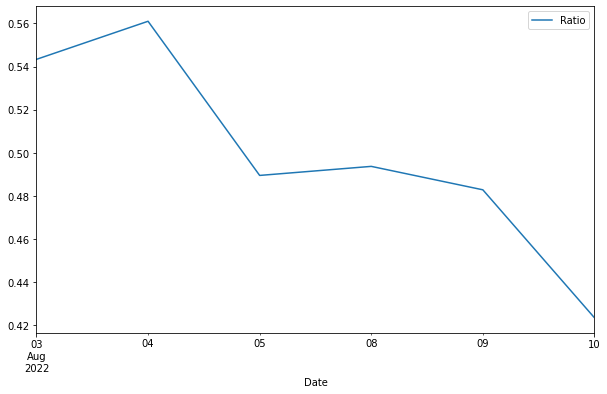

In [16]:
merged_df.plot.line(y=['Ratio'], figsize=(10,6))
#EDGX_ticker_df.plot.line(y=['Short Volume', 'Total Volume'], figsize=(10,6))

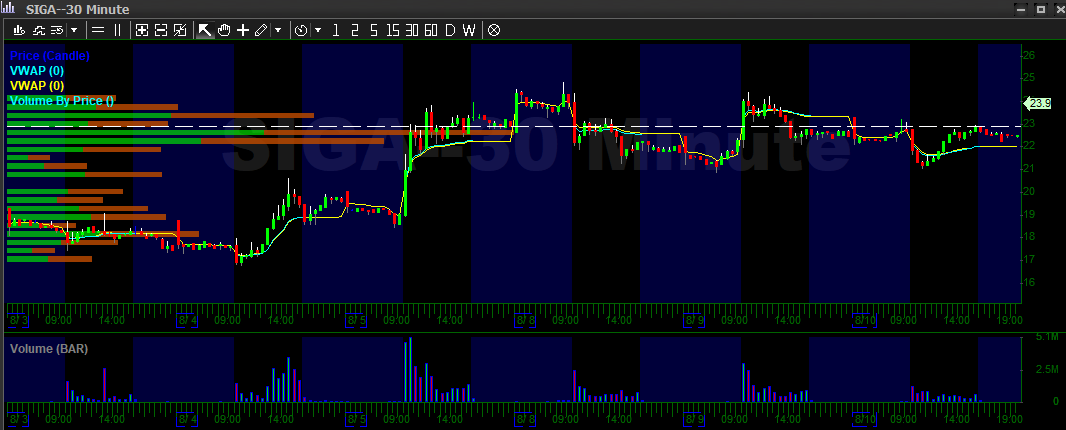

Looks pretty inconclusive bruv, able to hold up while 'buying pressure' fades, not sure what that would 'indicate', even tho doesn't look like a significant correlation exists still important to note correlation != causation. 

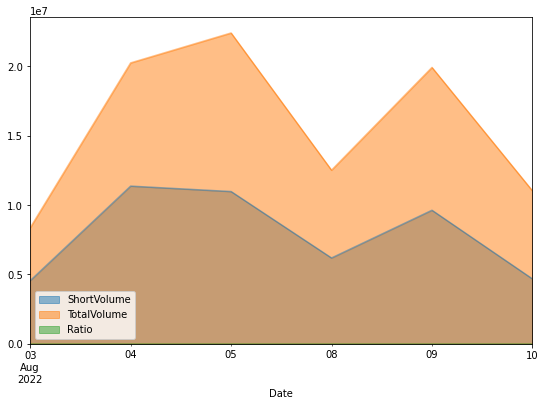

In [18]:
merged_df.plot(kind='area', stacked=False, figsize=(9,6))
#EDGX_ticker_df.plot(kind='area', stacked=False, figsize=(9,6))

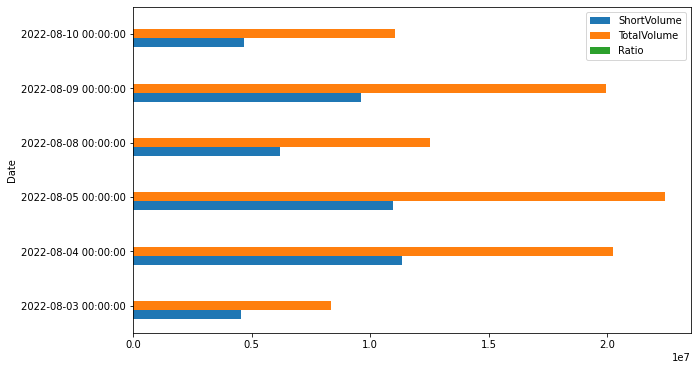

In [19]:
merged_df.plot(kind='barh', figsize=(10,6), ylabel='Volume')
#EDGX_ticker_df.plot(kind='barh', figsize=(10,6), ylabel='Volume')